This example shows how to calculate a polar for an airfoil. The chosen airfoil is the S805 wind turbine airfoil.

In [1]:
import viiflow as vf
import viiflowtools.vf_tools as vft
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# Read Airfoil Data
S805 = vft.repanel_spline(vft.read_selig("S805.dat"),180)

# Settings
RE = 1e6
ncrit = 9.0
Mach = 0.0
AOA0 = 0.0
s = vf.setup(RE,Mach,ncrit,AOA0)
s.silent = True # Do not output residual/iterations internally

# Internal iterations
s.itermax = 50

# We will put the results in here
alv = []
clv = []
cdv = []

# Set-up and initialize based on inviscid panel solution
# This calculates panel operator
[p,bl,x] = vf.init([S805],s)

# Go over AOA range
for alpha in np.arange(0,18.5,.5):
    
    # Set current alpha and set res/grad to None to tell viiflow that they are not valid
    s.alpha = alpha
    res = None
    grad = None
    
    # Run viiflow
    [x,flag,res,grad,info,gam_virtual_delta,CD_virtual_delta,CL_virtual_delta,gam_x,res_virtual_delta] = vf.iter(x,bl,p,s,res,grad)

    # If converged add to cl/cd vectors (could check flag as well, but this allows custom tolerance to use the results anyways)
    if np.sqrt(np.dot(res.T,res))<1e-3:
        alv.append(alpha)
        clv.append(p.CL)
        cdv.append(bl[0].CD[0])
        print('AL: %f CL: %f CD: %f' % (alpha,clv[-1],cdv[-1]))

AL: 0.000000 CL: 0.242928 CD: 0.006787
AL: 0.500000 CL: 0.300635 CD: 0.006903
AL: 1.000000 CL: 0.358455 CD: 0.007004
AL: 1.500000 CL: 0.416049 CD: 0.007083
AL: 2.000000 CL: 0.474040 CD: 0.007069
AL: 2.500000 CL: 0.531639 CD: 0.007197
AL: 3.000000 CL: 0.589848 CD: 0.007134
AL: 3.500000 CL: 0.646590 CD: 0.007108
AL: 4.000000 CL: 0.704421 CD: 0.007134
AL: 4.500000 CL: 0.761267 CD: 0.007171
AL: 5.000000 CL: 0.818459 CD: 0.007154
AL: 5.500000 CL: 0.870809 CD: 0.007506
AL: 6.000000 CL: 0.911268 CD: 0.008924
AL: 6.500000 CL: 0.952135 CD: 0.010349
AL: 7.000000 CL: 0.991949 CD: 0.011541
AL: 7.500000 CL: 1.032319 CD: 0.012683
AL: 8.000000 CL: 1.072008 CD: 0.013670
AL: 8.500000 CL: 1.112773 CD: 0.014562
AL: 9.000000 CL: 1.147468 CD: 0.015492
AL: 9.500000 CL: 1.181299 CD: 0.016653
AL: 10.000000 CL: 1.213495 CD: 0.017833
AL: 10.500000 CL: 1.236615 CD: 0.019644
AL: 11.000000 CL: 1.254070 CD: 0.022144
AL: 11.500000 CL: 1.276326 CD: 0.024497
AL: 12.000000 CL: 1.286662 CD: 0.028101
AL: 12.500000 CL: 1.

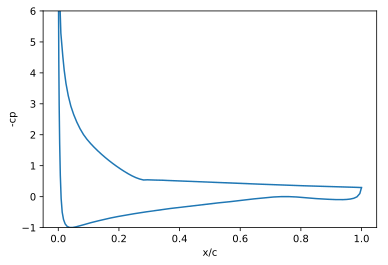

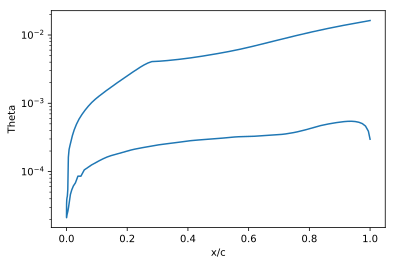

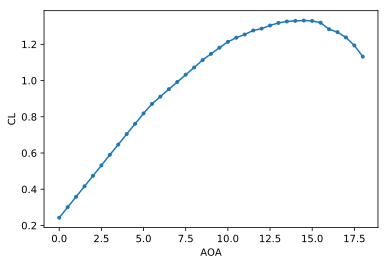

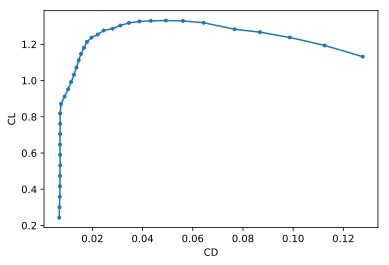

In [2]:
# All plots show the last results, because that is currently available

# Inviscid regime plots
plt.plot(p.foils[0].X[0,:],np.power(p.gamma_viscid[0:p.NS],2)-1)
plt.xlabel('x/c');plt.ylabel('-cp')
plt.ylim([-1,6])
plt.show()

# Viscid plot
plt.semilogy(p.foils[0].X[0,:],bl[0].bl_fl.nodes.theta)
plt.xlabel('x/c');plt.ylabel('Theta')
plt.show()

# Polar result
plt.plot(alv,clv,marker=".");
plt.xlabel('AOA');plt.ylabel('CL')
plt.show()
plt.plot(cdv,clv,marker=".");
plt.xlabel('CD');plt.ylabel('CL')
plt.show()